In [1]:
import torch

from NeuroVisualizer.neuro_aux.AEmodel import UniformAutoencoder

from helper.neuro_viz import get_dataloader_flat

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/crebmann/miniconda3/envs/phate-env/lib/python3.10/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


# Neuro-Visualizer
This notebook creates the loss landscape from the NeuroVisualizer

In [ ]:
dataset_name = 'mnist'
run_ids = [
    "run-0011-CNN_mnist_32_0.9776", # No Residual
    "run-0012-CNN_mnist_32_0.9768", # No Residual
]

titles = [
    "SGD, 0.9776",
    "SAM, 0.9768"
]

In [2]:
dataset_name = 'mnist'
run_ids = [
    "run-0013-CNN_mnist_32_0.9797", # Residual
    "run-0014-CNN_mnist_32_0.9744", # Residual
]

titles = [
    "SGD, 0.9797",
    "SAM, 0.9744"
]

In [ ]:
# CNN x CIFAR 10 
dataset_name = 'cifar10'

run_ids = [
    "run-0017-CNN_cifar10_128_0.8072",  # Seed 42, SAM
    "run-0019-CNN_cifar10_128_0.8487",  # Seed 42
    "run-0021-CNN_cifar10_128_0.8054",  # Seed 11, SAM
    "run-0023-CNN_cifar10_128_0.8509",  # Seed 11
    "run-0025-CNN_cifar10_128_0.8062",
    "run-0027-CNN_cifar10_128_0.8503"
]

titles = [
    "Seed 42, SAM, 0.8072",
    "Seed 42, SGD, 0.8487",
    "Seed 11, SAM, 0.8054",
    "Seed 11, SGD, 0.8509",
    "Seed 6, SAM, 0.8062",
    "Seed 6, SGD, 0.8503",
]

In [ ]:
# CNN Residual x CIFAR 10 
dataset_name = 'cifar10'

run_ids = [
    "run-0016-CNN_cifar10_128_0.8093",  # Seed 42, SAM, Residual
    "run-0018-CNN_cifar10_128_0.8499",  # Seed 42, Residual
    "run-0020-CNN_cifar10_128_0.8079",  # Seed 11, SAM, Residual
    "run-0022-CNN_cifar10_128_0.8519",  # Seed 11, Residual
    "run-0024-CNN_cifar10_128_0.8062",
    "run-0026-CNN_cifar10_128_0.8504"
]

titles = [
    "Seed 42, SAM, Residual 0.8093",
    "Seed 42, SGD, Residual 0.8499",
    "Seed 11, SAM, Residual 0.8079",
    "Seed 11, SGD, Residual 0.8519",
    "Seed 6, SAM, Residual 0.0.8062",
    "Seed 6, SGD, Residual 0.8504",
]

In [3]:
include_lmc = True

### Load Paths

In [4]:
from helper.visualization import Run

runs = []
for run_id in run_ids:
    runs.append(Run(run_id, dataset_name))

In [5]:
for run in runs:
    print(run.results["train_config"])

CNN|opt=SGD|lr=0.001|wd=0.05|sam=False
CNN|opt=SAMSGD|lr=0.001|wd=0.05|sam=True


In [6]:
pt_files_per_run = [run.get_pt_files() for run in runs]

trainings/run-0013-CNN has 13 files
Found 13 checkpoint files.
trainings/run-0014-CNN has 13 files
Found 13 checkpoint files.


In [7]:
vis_id = ' x '.join([run.results["ll_flattened_weights_dir"] for run in runs])
model_file = f'ae_models/{vis_id}{"-LMC" if include_lmc else ""}.pt'
print(model_file)

#model_file = "ae_models/run-0016-CNN x run-0018-CNN x run-0020-CNN x run-0022-CNN x run-0024-CNN x run-0026-CNN.pt"

ae_models/run-0013-CNN x run-0014-CNN-LMC.pt


In [8]:
pt_files_per_run

[['trainings/run-0013-CNN/model-0.pt',
  'trainings/run-0013-CNN/model-1.pt',
  'trainings/run-0013-CNN/model-2.pt',
  'trainings/run-0013-CNN/model-3.pt',
  'trainings/run-0013-CNN/model-4.pt',
  'trainings/run-0013-CNN/model-5.pt',
  'trainings/run-0013-CNN/model-6.pt',
  'trainings/run-0013-CNN/model-7.pt',
  'trainings/run-0013-CNN/model-8.pt',
  'trainings/run-0013-CNN/model-9.pt',
  'trainings/run-0013-CNN/model-10.pt',
  'trainings/run-0013-CNN/model-11.pt',
  'trainings/run-0013-CNN/model-12.pt'],
 ['trainings/run-0014-CNN/model-0.pt',
  'trainings/run-0014-CNN/model-1.pt',
  'trainings/run-0014-CNN/model-2.pt',
  'trainings/run-0014-CNN/model-3.pt',
  'trainings/run-0014-CNN/model-4.pt',
  'trainings/run-0014-CNN/model-5.pt',
  'trainings/run-0014-CNN/model-6.pt',
  'trainings/run-0014-CNN/model-7.pt',
  'trainings/run-0014-CNN/model-8.pt',
  'trainings/run-0014-CNN/model-9.pt',
  'trainings/run-0014-CNN/model-10.pt',
  'trainings/run-0014-CNN/model-11.pt',
  'trainings/run-00

In [9]:
# Filter for final epochs only

# pt_files_per_run = []

# for run in runs:
#     min_loss = min(run.results["val_losses"])
#     max_visualize = min_loss * 1.1
#     print(max_visualize)
#     # Find in run.results["val_losses"] idx where val losses is first below max_visualize
#     idx = next((i for i, v in enumerate(run.results["val_losses"]) if v <= max_visualize), None)
#     pt_files_per_run.append(run.get_pt_files()[idx:])
#
# pt_files_per_run

## Train AE Model
Run this part to train an AE-Model

In [10]:
batch_size = 3 #4 - 32 Batch Size of AE Training

loader, normalizer = get_dataloader_flat(
    pt_files_per_run,
    batch_size,
    include_lmc=include_lmc,
    shuffle=True,
)

3


In [11]:
torch.cuda.empty_cache()

Adjust: Choose the hidden dimension (that the model-GPU combination is still working with)

In [12]:
input_dim = loader.dataset[0].shape[0]
print(f"Input dimension: {input_dim}")

latent_dim = 2
num_layers = 4

# Aggressive compression (scales with first hidden dim)
#h = [input_dim, 64, 32, 8]
#h = [input_dim, 126, 64, 32]
#h = [input_dim, 200, 100, 50]
#ae = UniformAutoencoder(input_dim, num_layers, latent_dim, h=h).to(device)

ae = UniformAutoencoder(input_dim, num_layers, latent_dim).to(device)

Input dimension: 29858


In [13]:
total_params = sum(p.numel() for p in ae.parameters())
trainable_params = sum(p.numel() for p in ae.parameters() if p.requires_grad)

size_mb = total_params * 4 / (1024**2)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Approx. size: {size_mb:.2f} MB")

# print(f"Approx. size: {size_mb:.2f} MB")

Total parameters: 266,533,728
Trainable parameters: 266,533,728
Approx. size: 1016.75 MB


In [14]:
# Load from previous train process (if available, eg. after a crash)
# ae.load_state_dict(torch.load(model_file, weights_only=True))

In [15]:
from helper.neuro_viz import train_autoencoder

trained_model = train_autoencoder(
    model=ae,
    train_loader=loader,
    device=device,
    save_path=model_file,
    num_epochs=500, #1000 would be great
    lr=0.01, # Start with 0.01
    patience=15,
    avoid_overheat=False, # Avoids chrashes on Nembus Computer
    #last_saved_loss=0.44, # Minimum Loss to save
    verbose=True
)
# ~ 0.0173 possible (CIFAR10 CNN)

Epoch 1 (inf, 1.000e-02): 100%|██████████| 12/12 [00:12<00:00,  1.04s/it]


Epoch 001 - Avg Loss: 21.472838
✅ New best model saved with loss 21.472838


Epoch 2 (21.4728, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 002 - Avg Loss: 3.870158
✅ New best model saved with loss 3.870158


Epoch 3 (3.8702, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 003 - Avg Loss: 4.513888
No improvement for 1 epochs.


Epoch 4 (4.5139, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 004 - Avg Loss: 2.331164
✅ New best model saved with loss 2.331164


Epoch 5 (2.3312, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 005 - Avg Loss: 1.661144
✅ New best model saved with loss 1.661144


Epoch 6 (1.6611, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 006 - Avg Loss: 1.659093


Epoch 7 (1.6591, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


Epoch 007 - Avg Loss: 2.218762
No improvement for 1 epochs.


Epoch 8 (2.2188, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 008 - Avg Loss: 2.173445
No improvement for 2 epochs.


Epoch 9 (2.1734, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 009 - Avg Loss: 1.971686
No improvement for 3 epochs.


Epoch 10 (1.9717, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 010 - Avg Loss: 2.481620
No improvement for 4 epochs.


Epoch 11 (2.4816, 1.000e-02): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 011 - Avg Loss: 2.310397
No improvement for 5 epochs.


Epoch 12 (2.3104, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 012 - Avg Loss: 1.487603
✅ New best model saved with loss 1.487603


Epoch 13 (1.4876, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 013 - Avg Loss: 1.057310
✅ New best model saved with loss 1.057310


Epoch 14 (1.0573, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 014 - Avg Loss: 1.246201
No improvement for 1 epochs.


Epoch 15 (1.2462, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


Epoch 015 - Avg Loss: 1.005899
✅ New best model saved with loss 1.005899


Epoch 16 (1.0059, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 016 - Avg Loss: 0.811910
✅ New best model saved with loss 0.811910


Epoch 17 (0.8119, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 017 - Avg Loss: 1.116520
No improvement for 1 epochs.


Epoch 18 (1.1165, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 018 - Avg Loss: 0.738148
✅ New best model saved with loss 0.738148


Epoch 19 (0.7381, 5.000e-03): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 019 - Avg Loss: 0.848387
No improvement for 1 epochs.


Epoch 20 (0.8484, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.03it/s]


Epoch 020 - Avg Loss: 0.913319
No improvement for 2 epochs.


Epoch 21 (0.9133, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.04it/s]


Epoch 021 - Avg Loss: 0.970201
No improvement for 3 epochs.


Epoch 22 (0.9702, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 022 - Avg Loss: 0.848081
No improvement for 4 epochs.


Epoch 23 (0.8481, 5.000e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 023 - Avg Loss: 0.792231
No improvement for 5 epochs.


Epoch 24 (0.7922, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 024 - Avg Loss: 0.617839
✅ New best model saved with loss 0.617839


Epoch 25 (0.6178, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 025 - Avg Loss: 0.544569
✅ New best model saved with loss 0.544569


Epoch 26 (0.5446, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 026 - Avg Loss: 0.529887
✅ New best model saved with loss 0.529887


Epoch 27 (0.5299, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 027 - Avg Loss: 0.527599


Epoch 28 (0.5276, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 028 - Avg Loss: 0.507350
✅ New best model saved with loss 0.507350


Epoch 29 (0.5074, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.03it/s]


Epoch 029 - Avg Loss: 0.493942
✅ New best model saved with loss 0.493942


Epoch 30 (0.4939, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 030 - Avg Loss: 0.577796
No improvement for 1 epochs.


Epoch 31 (0.5778, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 031 - Avg Loss: 0.553558
No improvement for 2 epochs.


Epoch 32 (0.5536, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 032 - Avg Loss: 0.501761
No improvement for 3 epochs.


Epoch 33 (0.5018, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 033 - Avg Loss: 0.472602
✅ New best model saved with loss 0.472602


Epoch 34 (0.4726, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 034 - Avg Loss: 0.564545
No improvement for 1 epochs.


Epoch 35 (0.5645, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 035 - Avg Loss: 0.598030
No improvement for 2 epochs.


Epoch 36 (0.5980, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 036 - Avg Loss: 0.503850
No improvement for 3 epochs.


Epoch 37 (0.5038, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 037 - Avg Loss: 0.633494
No improvement for 4 epochs.


Epoch 38 (0.6335, 2.500e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 038 - Avg Loss: 0.611773
No improvement for 5 epochs.


Epoch 39 (0.6118, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.03it/s]


Epoch 039 - Avg Loss: 0.384875
✅ New best model saved with loss 0.384875


Epoch 40 (0.3849, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 040 - Avg Loss: 0.355582
✅ New best model saved with loss 0.355582


Epoch 41 (0.3556, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 041 - Avg Loss: 0.315992
✅ New best model saved with loss 0.315992


Epoch 42 (0.3160, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 042 - Avg Loss: 0.308930
✅ New best model saved with loss 0.308930


Epoch 43 (0.3089, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 043 - Avg Loss: 0.343348
No improvement for 1 epochs.


Epoch 44 (0.3433, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 044 - Avg Loss: 0.275517
✅ New best model saved with loss 0.275517


Epoch 45 (0.2755, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 045 - Avg Loss: 0.290831
No improvement for 1 epochs.


Epoch 46 (0.2908, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 046 - Avg Loss: 0.247163
✅ New best model saved with loss 0.247163


Epoch 47 (0.2472, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 047 - Avg Loss: 0.215863
✅ New best model saved with loss 0.215863


Epoch 48 (0.2159, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 048 - Avg Loss: 0.226957
No improvement for 1 epochs.


Epoch 49 (0.2270, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 049 - Avg Loss: 0.240752
No improvement for 2 epochs.


Epoch 50 (0.2408, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 050 - Avg Loss: 0.184110
✅ New best model saved with loss 0.184110


Epoch 51 (0.1841, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 051 - Avg Loss: 0.166040
✅ New best model saved with loss 0.166040


Epoch 52 (0.1660, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 052 - Avg Loss: 0.150078
✅ New best model saved with loss 0.150078


Epoch 53 (0.1501, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 053 - Avg Loss: 0.157144
No improvement for 1 epochs.


Epoch 54 (0.1571, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 054 - Avg Loss: 0.149095


Epoch 55 (0.1491, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 055 - Avg Loss: 0.132668
✅ New best model saved with loss 0.132668


Epoch 56 (0.1327, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 056 - Avg Loss: 0.123417
✅ New best model saved with loss 0.123417


Epoch 57 (0.1234, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


Epoch 057 - Avg Loss: 0.111651
✅ New best model saved with loss 0.111651


Epoch 58 (0.1117, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.07it/s]


Epoch 058 - Avg Loss: 0.104742
✅ New best model saved with loss 0.104742


Epoch 59 (0.1047, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.03it/s]


Epoch 059 - Avg Loss: 0.102782
✅ New best model saved with loss 0.102782


Epoch 60 (0.1028, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 060 - Avg Loss: 0.088324
✅ New best model saved with loss 0.088324


Epoch 61 (0.0883, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.04it/s]


Epoch 061 - Avg Loss: 0.084785
✅ New best model saved with loss 0.084785


Epoch 62 (0.0848, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 062 - Avg Loss: 0.076995
✅ New best model saved with loss 0.076995


Epoch 63 (0.0770, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 063 - Avg Loss: 0.119542
No improvement for 1 epochs.


Epoch 64 (0.1195, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 064 - Avg Loss: 0.159863
No improvement for 2 epochs.


Epoch 65 (0.1599, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 065 - Avg Loss: 0.111191
No improvement for 3 epochs.


Epoch 66 (0.1112, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 066 - Avg Loss: 0.086344
No improvement for 4 epochs.


Epoch 67 (0.0863, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 067 - Avg Loss: 0.075596
✅ New best model saved with loss 0.075596


Epoch 68 (0.0756, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


Epoch 068 - Avg Loss: 0.066892
✅ New best model saved with loss 0.066892


Epoch 69 (0.0669, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 069 - Avg Loss: 0.073810
No improvement for 1 epochs.


Epoch 70 (0.0738, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 070 - Avg Loss: 0.062718
✅ New best model saved with loss 0.062718


Epoch 71 (0.0627, 1.250e-03): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 071 - Avg Loss: 0.051180
✅ New best model saved with loss 0.051180


Epoch 72 (0.0512, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.04it/s]


Epoch 072 - Avg Loss: 0.052649
No improvement for 1 epochs.


Epoch 73 (0.0526, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 073 - Avg Loss: 0.047844
✅ New best model saved with loss 0.047844


Epoch 74 (0.0478, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]


Epoch 074 - Avg Loss: 0.050389
No improvement for 1 epochs.


Epoch 75 (0.0504, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 075 - Avg Loss: 0.049881
No improvement for 2 epochs.


Epoch 76 (0.0499, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 076 - Avg Loss: 0.045287
✅ New best model saved with loss 0.045287


Epoch 77 (0.0453, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


Epoch 077 - Avg Loss: 0.047825
No improvement for 1 epochs.


Epoch 78 (0.0478, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 078 - Avg Loss: 0.040206
✅ New best model saved with loss 0.040206


Epoch 79 (0.0402, 1.250e-03): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 079 - Avg Loss: 0.036515
✅ New best model saved with loss 0.036515


Epoch 80 (0.0365, 1.250e-03): 100%|██████████| 12/12 [00:12<00:00,  1.04s/it]


Epoch 080 - Avg Loss: 0.046289
No improvement for 1 epochs.


Epoch 81 (0.0463, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 081 - Avg Loss: 0.041802
No improvement for 2 epochs.


Epoch 82 (0.0418, 1.250e-03): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 082 - Avg Loss: 0.039805
No improvement for 3 epochs.


Epoch 83 (0.0398, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


Epoch 083 - Avg Loss: 0.042165
No improvement for 4 epochs.


Epoch 84 (0.0422, 1.250e-03): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 084 - Avg Loss: 0.048154
No improvement for 5 epochs.


Epoch 85 (0.0482, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 085 - Avg Loss: 0.056869
No improvement for 6 epochs.


Epoch 86 (0.0569, 6.250e-04): 100%|██████████| 12/12 [00:13<00:00,  1.10s/it]


Epoch 086 - Avg Loss: 0.049239
No improvement for 7 epochs.


Epoch 87 (0.0492, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 087 - Avg Loss: 0.032969
✅ New best model saved with loss 0.032969


Epoch 88 (0.0330, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 088 - Avg Loss: 0.030962
✅ New best model saved with loss 0.030962


Epoch 89 (0.0310, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 089 - Avg Loss: 0.030942


Epoch 90 (0.0309, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.04it/s]


Epoch 090 - Avg Loss: 0.027926
✅ New best model saved with loss 0.027926


Epoch 91 (0.0279, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 091 - Avg Loss: 0.026287
✅ New best model saved with loss 0.026287


Epoch 92 (0.0263, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 092 - Avg Loss: 0.028108
No improvement for 1 epochs.


Epoch 93 (0.0281, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 093 - Avg Loss: 0.026710
No improvement for 2 epochs.


Epoch 94 (0.0267, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.03it/s]


Epoch 094 - Avg Loss: 0.025544
✅ New best model saved with loss 0.025544


Epoch 95 (0.0255, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 095 - Avg Loss: 0.025338


Epoch 96 (0.0253, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 096 - Avg Loss: 0.025188
✅ New best model saved with loss 0.025188


Epoch 97 (0.0252, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 097 - Avg Loss: 0.025038


Epoch 98 (0.0250, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


Epoch 098 - Avg Loss: 0.025470
No improvement for 1 epochs.


Epoch 99 (0.0255, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.04it/s]


Epoch 099 - Avg Loss: 0.026813
No improvement for 2 epochs.


Epoch 100 (0.0268, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 100 - Avg Loss: 0.023060
✅ New best model saved with loss 0.023060


Epoch 101 (0.0231, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.03it/s]


Epoch 101 - Avg Loss: 0.024167
No improvement for 1 epochs.


Epoch 102 (0.0242, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 102 - Avg Loss: 0.023127
No improvement for 2 epochs.


Epoch 103 (0.0231, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 103 - Avg Loss: 0.022311
✅ New best model saved with loss 0.022311


Epoch 104 (0.0223, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 104 - Avg Loss: 0.022296


Epoch 105 (0.0223, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 105 - Avg Loss: 0.021643
✅ New best model saved with loss 0.021643


Epoch 106 (0.0216, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 106 - Avg Loss: 0.023291
No improvement for 1 epochs.


Epoch 107 (0.0233, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 107 - Avg Loss: 0.021882
No improvement for 2 epochs.


Epoch 108 (0.0219, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 108 - Avg Loss: 0.022482
No improvement for 3 epochs.


Epoch 109 (0.0225, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 109 - Avg Loss: 0.023315
No improvement for 4 epochs.


Epoch 110 (0.0233, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


Epoch 110 - Avg Loss: 0.020098
✅ New best model saved with loss 0.020098


Epoch 111 (0.0201, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 111 - Avg Loss: 0.020300
No improvement for 1 epochs.


Epoch 112 (0.0203, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 112 - Avg Loss: 0.020131
No improvement for 2 epochs.


Epoch 113 (0.0201, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 113 - Avg Loss: 0.019068
✅ New best model saved with loss 0.019068


Epoch 114 (0.0191, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 114 - Avg Loss: 0.020212
No improvement for 1 epochs.


Epoch 115 (0.0202, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 115 - Avg Loss: 0.018727
✅ New best model saved with loss 0.018727


Epoch 116 (0.0187, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 116 - Avg Loss: 0.019051
No improvement for 1 epochs.


Epoch 117 (0.0191, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 117 - Avg Loss: 0.018514
✅ New best model saved with loss 0.018514


Epoch 118 (0.0185, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 118 - Avg Loss: 0.016859
✅ New best model saved with loss 0.016859


Epoch 119 (0.0169, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 119 - Avg Loss: 0.017266
No improvement for 1 epochs.


Epoch 120 (0.0173, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 120 - Avg Loss: 0.018765
No improvement for 2 epochs.


Epoch 121 (0.0188, 6.250e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 121 - Avg Loss: 0.019166
No improvement for 3 epochs.


Epoch 122 (0.0192, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 122 - Avg Loss: 0.019614
No improvement for 4 epochs.


Epoch 123 (0.0196, 6.250e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 123 - Avg Loss: 0.020253
No improvement for 5 epochs.


Epoch 124 (0.0203, 3.125e-04): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]


Epoch 124 - Avg Loss: 0.015429
✅ New best model saved with loss 0.015429


Epoch 125 (0.0154, 3.125e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 125 - Avg Loss: 0.014531
✅ New best model saved with loss 0.014531


Epoch 126 (0.0145, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 126 - Avg Loss: 0.014745
No improvement for 1 epochs.


Epoch 127 (0.0147, 3.125e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 127 - Avg Loss: 0.014358
✅ New best model saved with loss 0.014358


Epoch 128 (0.0144, 3.125e-04): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 128 - Avg Loss: 0.013663
✅ New best model saved with loss 0.013663


Epoch 129 (0.0137, 3.125e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 129 - Avg Loss: 0.013835
No improvement for 1 epochs.


Epoch 130 (0.0138, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 130 - Avg Loss: 0.013165
✅ New best model saved with loss 0.013165


Epoch 131 (0.0132, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 131 - Avg Loss: 0.013058


Epoch 132 (0.0131, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 132 - Avg Loss: 0.012764
✅ New best model saved with loss 0.012764


Epoch 133 (0.0128, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 133 - Avg Loss: 0.013002
No improvement for 1 epochs.


Epoch 134 (0.0130, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 134 - Avg Loss: 0.012872
No improvement for 2 epochs.


Epoch 135 (0.0129, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 135 - Avg Loss: 0.012804
No improvement for 3 epochs.


Epoch 136 (0.0128, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 136 - Avg Loss: 0.012241
✅ New best model saved with loss 0.012241


Epoch 137 (0.0122, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 137 - Avg Loss: 0.012452
No improvement for 1 epochs.


Epoch 138 (0.0125, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 138 - Avg Loss: 0.012227


Epoch 139 (0.0122, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 139 - Avg Loss: 0.012122


Epoch 140 (0.0121, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 140 - Avg Loss: 0.012129
No improvement for 1 epochs.


Epoch 141 (0.0121, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.04s/it]


Epoch 141 - Avg Loss: 0.011570
✅ New best model saved with loss 0.011570


Epoch 142 (0.0116, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 142 - Avg Loss: 0.011796
No improvement for 1 epochs.


Epoch 143 (0.0118, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 143 - Avg Loss: 0.011048
✅ New best model saved with loss 0.011048


Epoch 144 (0.0110, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 144 - Avg Loss: 0.011197
No improvement for 1 epochs.


Epoch 145 (0.0112, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 145 - Avg Loss: 0.011351
No improvement for 2 epochs.


Epoch 146 (0.0114, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 146 - Avg Loss: 0.011607
No improvement for 3 epochs.


Epoch 147 (0.0116, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.07s/it]


Epoch 147 - Avg Loss: 0.011073
No improvement for 4 epochs.


Epoch 148 (0.0111, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 148 - Avg Loss: 0.010815
✅ New best model saved with loss 0.010815


Epoch 149 (0.0108, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 149 - Avg Loss: 0.010652
✅ New best model saved with loss 0.010652


Epoch 150 (0.0107, 3.125e-04): 100%|██████████| 12/12 [00:13<00:00,  1.09s/it]


Epoch 150 - Avg Loss: 0.011285
No improvement for 1 epochs.


Epoch 151 (0.0113, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 151 - Avg Loss: 0.010619


Epoch 152 (0.0106, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 152 - Avg Loss: 0.010613


Epoch 153 (0.0106, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 153 - Avg Loss: 0.010957
No improvement for 1 epochs.


Epoch 154 (0.0110, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 154 - Avg Loss: 0.009908
✅ New best model saved with loss 0.009908


Epoch 155 (0.0099, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 155 - Avg Loss: 0.010333
No improvement for 1 epochs.


Epoch 156 (0.0103, 3.125e-04): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 156 - Avg Loss: 0.009947
No improvement for 2 epochs.


Epoch 157 (0.0099, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 157 - Avg Loss: 0.009985
No improvement for 3 epochs.


Epoch 158 (0.0100, 3.125e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 158 - Avg Loss: 0.010065
No improvement for 4 epochs.


Epoch 159 (0.0101, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 159 - Avg Loss: 0.009726
✅ New best model saved with loss 0.009726


Epoch 160 (0.0097, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 160 - Avg Loss: 0.009822
No improvement for 1 epochs.


Epoch 161 (0.0098, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 161 - Avg Loss: 0.009627
✅ New best model saved with loss 0.009627


Epoch 162 (0.0096, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 162 - Avg Loss: 0.009540


Epoch 163 (0.0095, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 163 - Avg Loss: 0.010000
No improvement for 1 epochs.


Epoch 164 (0.0100, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.04s/it]


Epoch 164 - Avg Loss: 0.009396
✅ New best model saved with loss 0.009396


Epoch 165 (0.0094, 3.125e-04): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]


Epoch 165 - Avg Loss: 0.009085
✅ New best model saved with loss 0.009085


Epoch 166 (0.0091, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 166 - Avg Loss: 0.009829
No improvement for 1 epochs.


Epoch 167 (0.0098, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 167 - Avg Loss: 0.009231
No improvement for 2 epochs.


Epoch 168 (0.0092, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 168 - Avg Loss: 0.009171
No improvement for 3 epochs.


Epoch 169 (0.0092, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.07s/it]


Epoch 169 - Avg Loss: 0.008993
✅ New best model saved with loss 0.008993


Epoch 170 (0.0090, 3.125e-04): 100%|██████████| 12/12 [00:11<00:00,  1.00it/s]


Epoch 170 - Avg Loss: 0.009325
No improvement for 1 epochs.


Epoch 171 (0.0093, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 171 - Avg Loss: 0.009052
No improvement for 2 epochs.


Epoch 172 (0.0091, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.07s/it]


Epoch 172 - Avg Loss: 0.008873
✅ New best model saved with loss 0.008873


Epoch 173 (0.0089, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 173 - Avg Loss: 0.009127
No improvement for 1 epochs.


Epoch 174 (0.0091, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 174 - Avg Loss: 0.008729
✅ New best model saved with loss 0.008729


Epoch 175 (0.0087, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.07s/it]


Epoch 175 - Avg Loss: 0.009332
No improvement for 1 epochs.


Epoch 176 (0.0093, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 176 - Avg Loss: 0.009256
No improvement for 2 epochs.


Epoch 177 (0.0093, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 177 - Avg Loss: 0.008897
No improvement for 3 epochs.


Epoch 178 (0.0089, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 178 - Avg Loss: 0.008608
✅ New best model saved with loss 0.008608


Epoch 179 (0.0086, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 179 - Avg Loss: 0.008520
✅ New best model saved with loss 0.008520


Epoch 180 (0.0085, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 180 - Avg Loss: 0.008586
No improvement for 1 epochs.


Epoch 181 (0.0086, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 181 - Avg Loss: 0.008005
✅ New best model saved with loss 0.008005


Epoch 182 (0.0080, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 182 - Avg Loss: 0.008240
No improvement for 1 epochs.


Epoch 183 (0.0082, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 183 - Avg Loss: 0.008723
No improvement for 2 epochs.


Epoch 184 (0.0087, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 184 - Avg Loss: 0.008163
No improvement for 3 epochs.


Epoch 185 (0.0082, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.07s/it]


Epoch 185 - Avg Loss: 0.008309
No improvement for 4 epochs.


Epoch 186 (0.0083, 3.125e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 186 - Avg Loss: 0.008022
No improvement for 5 epochs.


Epoch 187 (0.0080, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 187 - Avg Loss: 0.007735
✅ New best model saved with loss 0.007735


Epoch 188 (0.0077, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 188 - Avg Loss: 0.007675


Epoch 189 (0.0077, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 189 - Avg Loss: 0.007416
✅ New best model saved with loss 0.007416


Epoch 190 (0.0074, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 190 - Avg Loss: 0.007233
✅ New best model saved with loss 0.007233


Epoch 191 (0.0072, 1.563e-04): 100%|██████████| 12/12 [00:13<00:00,  1.09s/it]


Epoch 191 - Avg Loss: 0.007459
No improvement for 1 epochs.


Epoch 192 (0.0075, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.08s/it]


Epoch 192 - Avg Loss: 0.007193


Epoch 193 (0.0072, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 193 - Avg Loss: 0.007147
✅ New best model saved with loss 0.007147


Epoch 194 (0.0071, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 194 - Avg Loss: 0.007268
No improvement for 1 epochs.


Epoch 195 (0.0073, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 195 - Avg Loss: 0.007336
No improvement for 2 epochs.


Epoch 196 (0.0073, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 196 - Avg Loss: 0.007309
No improvement for 3 epochs.


Epoch 197 (0.0073, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 197 - Avg Loss: 0.007152
No improvement for 4 epochs.


Epoch 198 (0.0072, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.07s/it]


Epoch 198 - Avg Loss: 0.006918
✅ New best model saved with loss 0.006918


Epoch 199 (0.0069, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 199 - Avg Loss: 0.007263
No improvement for 1 epochs.


Epoch 200 (0.0073, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 200 - Avg Loss: 0.007240
No improvement for 2 epochs.


Epoch 201 (0.0072, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 201 - Avg Loss: 0.006921
No improvement for 3 epochs.


Epoch 202 (0.0069, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 202 - Avg Loss: 0.006961
No improvement for 4 epochs.


Epoch 203 (0.0070, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 203 - Avg Loss: 0.006805
✅ New best model saved with loss 0.006805


Epoch 204 (0.0068, 1.563e-04): 100%|██████████| 12/12 [00:13<00:00,  1.08s/it]


Epoch 204 - Avg Loss: 0.007140
No improvement for 1 epochs.


Epoch 205 (0.0071, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 205 - Avg Loss: 0.007002
No improvement for 2 epochs.


Epoch 206 (0.0070, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.03s/it]


Epoch 206 - Avg Loss: 0.006913
No improvement for 3 epochs.


Epoch 207 (0.0069, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 207 - Avg Loss: 0.006703
✅ New best model saved with loss 0.006703


Epoch 208 (0.0067, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 208 - Avg Loss: 0.006993
No improvement for 1 epochs.


Epoch 209 (0.0070, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.00s/it]


Epoch 209 - Avg Loss: 0.007005
No improvement for 2 epochs.


Epoch 210 (0.0070, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


Epoch 210 - Avg Loss: 0.006820
No improvement for 3 epochs.


Epoch 211 (0.0068, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.06s/it]


Epoch 211 - Avg Loss: 0.006848
No improvement for 4 epochs.


Epoch 212 (0.0068, 1.563e-04): 100%|██████████| 12/12 [00:12<00:00,  1.02s/it]


Epoch 212 - Avg Loss: 0.006826
No improvement for 5 epochs.


Epoch 213 (0.0068, 7.813e-05): 100%|██████████| 12/12 [00:12<00:00,  1.05s/it]


Epoch 213 - Avg Loss: 0.006646


Epoch 214 (0.0066, 7.813e-05): 100%|██████████| 12/12 [00:13<00:00,  1.12s/it]


Epoch 214 - Avg Loss: 0.006570
✅ New best model saved with loss 0.006570


Epoch 215 (0.0066, 7.813e-05): 100%|██████████| 12/12 [00:12<00:00,  1.08s/it]


Epoch 215 - Avg Loss: 0.006558


Epoch 216 (0.0066, 7.813e-05):  42%|████▏     | 5/12 [00:06<00:09,  1.29s/it]


KeyboardInterrupt: 

In [ ]:
torch.save(ae.state_dict(), model_file)

## Visualize Trajectory
Begin here when trained Autoencoder (AE) can be loaded

In [16]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from NeuroVisualizer.neuro_aux.AEmodel import UniformAutoencoder
from NeuroVisualizer.neuro_aux.utils import get_files, repopulate_model
from NeuroVisualizer.neuro_aux.trajectories_data import get_trajectory_dataloader

In [17]:
batch_size = 4
loss_name = 'test_loss'
whichloss = 'mse' # this is CrossEntropyLoss
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
# Get file list
# pt_files = get_files(model_folder, prefix="model-")

# Load AE
example_tensor = torch.load(pt_files_per_run[0][0], weights_only=True)
input_dim = example_tensor.shape[0]
latent_dim = 2
num_layers = 4
#h = [input_dim, 64, 32, 8]
#h = [input_dim, 128, 64, 16]
#h = [input_dim, 200, 100, 50]

#ae_model = UniformAutoencoder(input_dim, num_layers, latent_dim, h=h).to(device)
ae_model = UniformAutoencoder(input_dim, num_layers, latent_dim).to(device)
ae_model.load_state_dict(torch.load(model_file, weights_only=True))
_ = ae_model.eval()

In [19]:
# ---- Load data ----
from helper.neuro_viz import get_dataloader_flat

trajectory_loader, transform = get_dataloader_flat(pt_files_per_run, batch_size, shuffle=False) #[:5] for Subset

2


### Repopulate original Model Architecture
**IMPORTANT: needs correct model**

In [20]:
for run in runs:
    print(run.results["model_info"])

CNN(conv_dims=[8, 16], kernel_sizes=[3, 3], hidden_dims=[32], dropout=0.25, residual=True)
CNN(conv_dims=[8, 16], kernel_sizes=[3, 3], hidden_dims=[32], dropout=0.25, residual=True)


In [21]:
from helper.vision_classification import init_mlp_for_dataset, init_cnn_for_dataset
from helper.neuro_viz import Loss

#TODO Check the model:

#model = init_cnn_for_dataset(dataset_name, conv_dims=[8, 16], kernel_sizes=[3, 3], hidden_dims=[32], dropout=0.25, residual=False).to(device)
model = init_cnn_for_dataset(dataset_name, conv_dims=[8, 16], kernel_sizes=[3, 3], hidden_dims=[32], dropout=0.25, residual=True).to(device)

#model = init_cnn_for_dataset(dataset_name, conv_dims=[32, 64], kernel_sizes=[3, 3], hidden_dims=[128], dropout=0.25, residual=False).to(device)
#model = init_cnn_for_dataset(dataset, conv_dims=[32, 64], kernel_sizes=[3, 3], hidden_dims=[128], dropout=0.25, residual=True).to(device)
#model = init_cnn_for_dataset(dataset_name, conv_dims=[64, 128, 256], kernel_sizes=[5, 3, 3], hidden_dims=[256, 128], dropout=0.2, residual=True).to(device)
#model = init_mlp_for_dataset(dataset_name, hidden_dims=[254, 64], dropout=0.1).to(device)
loss_obj = Loss(dataset_name, device)

In [22]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Trainable parameters: {count_parameters(model):,}")
print(f"AE input/output dim:  {ae_model.encoder.fcs[0].in_features:,}")

Trainable parameters: 29,858
AE input/output dim:  29,858


#### Compute trajectory (Coordinates and Loss)

In [23]:
from helper.neuro_viz import compute_trajectory

trajectory_coordinates, trajectory_models, trajectory_losses, ae_losses_decode, ae_losses_finetuned = compute_trajectory(
    trajectory_loader,
    ae_model,
    transform,
    loss_obj,
    model,
    loss_name,
    whichloss,
    device,
    recalibrate_bn=True, # Optimizes Loss precision
)

Decoding trajectory: 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]


✅ Decoded trajectory shapes: coords torch.Size([26, 2]), models torch.Size([26, 29858])


Computing trajectory & AE(finetuned) losses:   0%|          | 0/26 [00:00<?, ?it/s]/home/crebmann/miniconda3/envs/phate-env/lib/python3.10/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Computing trajectory & AE(finetuned) losses: 100%|██████████| 26/26 [02:15<00:00,  5.21s/it]

AE loss changed (denorm) from 9.468e-06 → 9.468e-06


In [24]:
from helper.neuro_viz import compute_lmc_lines

lmc_coords_list, lmc_losses_list, lmc_meta = compute_lmc_lines(
    pt_files_per_run,
    ae_model,
    transform,
    loss_obj,
    model,
    loss_name,
    whichloss,
    device)

Decoding trajectory: 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]


✅ Decoded trajectory shapes: coords torch.Size([10, 2]), models torch.Size([10, 29858])


Computing trajectory & AE(finetuned) losses: 100%|██████████| 10/10 [00:51<00:00,  5.14s/it]

AE loss changed (denorm) from 6.629e-06 → 6.629e-06


In [ ]:
print(lmc_coords_list)

In [ ]:
print(ae_losses_decode)
print(ae_losses_decode.mean())
print(ae_losses_finetuned)
print(ae_losses_finetuned.mean())

In [29]:
# Get lengths for each run
chunk_sizes = [len(run) for run in pt_files_per_run]
num_chunks = len(chunk_sizes)

# Split trajectory arrays according to these lengths
tr_losses = np.split(trajectory_losses.cpu().numpy(), np.cumsum(chunk_sizes)[:-1])
tr_coordinates = np.split(trajectory_coordinates.cpu().numpy(), np.cumsum(chunk_sizes)[:-1])

In [30]:
real_losses = [run.results["val_losses"] for run in runs]

In [31]:
# Fix, that there is one epoch 0 for the pt files
for i in range(num_chunks):
    #first_loss = tr_losses[i][0]
    real_losses[i] = np.concatenate(([np.NaN], real_losses[i]))

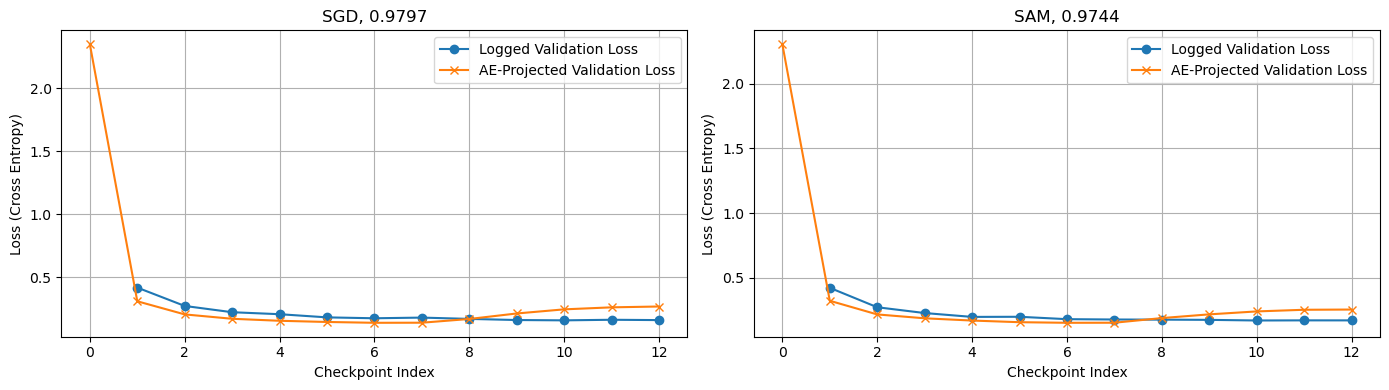

In [32]:
import matplotlib.pyplot as plt

cols = 2
rows = int(np.ceil(num_chunks / cols))

fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 4), squeeze=False)

for i in range(num_chunks):
    r, c = divmod(i, cols)
    ax = axes[r, c]

    ax.plot(real_losses[i], label='Logged Validation Loss', marker='o')
    ax.plot(tr_losses[i], label='AE-Projected Validation Loss', marker='x')

    ax.set_title(titles[i])
    ax.set_xlabel('Checkpoint Index')
    ax.set_ylabel('Loss (Cross Entropy)')
    ax.grid(True)
    ax.legend()

# Hide unused subplots (if odd number of runs)
for j in range(num_chunks, rows * cols):
    r, c = divmod(j, cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

In [33]:
# Generate grid in latent space
from helper.neuro_viz import generate_latent_grid, compute_grid_losses, compute_grid_losses_batched
xx, yy, grid_coords = generate_latent_grid(
    min_map=-1.1, max_map=1.1,
    xnum=25, # 3 - 25
    device=device
)

grid_losses = compute_grid_losses_batched(
    grid_coords,
    transform,
    ae_model,
    model,
    loss_obj,
    loss_name,
    whichloss,
    device,
)

# Reshape to grid
grid_losses = grid_losses.view(xx.shape)

Computing grid losses: 100%|██████████| 6/6 [58:14<00:00, 582.41s/it]


In [34]:
print(grid_losses.min().item(), grid_losses.max().item())

0.12122193723917007 2.417893648147583


In [35]:
rec_grid_models = ae_model.decoder(grid_coords)
rec_grid_models = rec_grid_models*transform.std.to(device) + transform.mean.to(device)

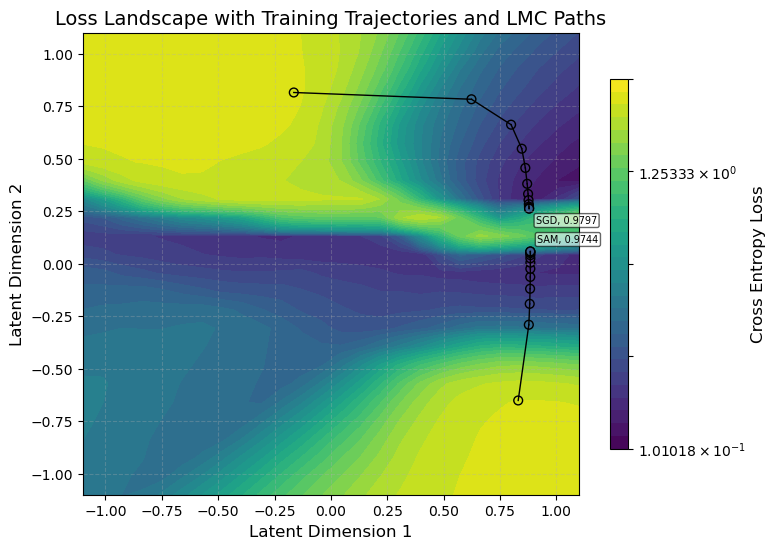

In [36]:
from helper.neuro_viz import plot_loss_landscape

fig = plot_loss_landscape(
    xx, yy,
    grid_losses,
    tr_losses, # real_losses or tr_losses
    tr_coordinates,
    rec_grid_models=rec_grid_models,
    draw_density=False,
    filled_contours=True,
    trajectory_labels=titles,            # NEW: list of strs, one per trajectory - ['Test 1', 'Test 2', 'Test 3', 'Test 4'],
    label_positions=[('left', 'top'), ('left', 'bottom'), ('right', 'bottom'), ('right', 'top'), ('left', 'center'), ('center', 'bottom')], # ('left'|'center'|'right', 'top'|'center'|'bottom')
)

In [37]:
# Save to PDF
os.makedirs('plots', exist_ok=True)
name = f"plots/loss_landscape_{vis_id}_{'lmc' if include_lmc else ''}.pdf"
fig.savefig(name, dpi=300, bbox_inches='tight', format='pdf')
print(f"Saved PDF to {name}")

Saved PDF to plots/loss_landscape_run-0013-CNN x run-0014-CNN_lmc.pdf


In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
import numpy as np

def plot_loss_landscape(
    xx, yy,
    grid_losses, trajectory_losses_list, trajectory_coords_list,
    rec_grid_models=None,
    draw_density=True,
    filled_contours=True,
    cmap='viridis',
    loss_label='Cross Entropy Loss',
    trajectory_labels=None,
    label_positions=None,
    lmc_coords_list=None,        # NEW
    lmc_losses_list=None         # NEW
):
    # === PREPARE LOSSES ===
    grid_losses_pos = grid_losses.detach().cpu().numpy()

    # === SHARED COLOR SCALE ===
    traj_losses_all = np.concatenate([t for t in trajectory_losses_list])
    all_losses = np.concatenate([grid_losses_pos.flatten(), traj_losses_all])
    vmin = np.clip(all_losses.min() / 1.2, 1e-5, None)
    vmax = all_losses.max() * 1.2

    if vmin >= vmax or np.isclose(vmin, vmax):
        vmax = vmin * 10
        print(f"Adjusted nearly-constant losses: vmin={vmin}, vmax={vmax}")

    levels = np.logspace(np.log10(vmin), np.log10(vmax), 30)
    norm = LogNorm(vmin=vmin, vmax=vmax)

    # === BEGIN PLOTTING ===
    fig, ax = plt.subplots(figsize=(8, 6))

    # -- 1 Loss Landscape --
    X = xx.cpu().numpy()
    Y = yy.cpu().numpy()

    if filled_contours:
        contour = ax.contourf(X, Y, grid_losses_pos, levels=levels, norm=norm, cmap=cmap)
    else:
        contour = ax.contour(X, Y, grid_losses_pos, levels=levels, norm=norm, cmap=cmap)
        ax.clabel(contour, fmt="%.2e", fontsize=8)

    cbar = plt.colorbar(contour, ax=ax, shrink=0.8)
    ticks = np.logspace(np.log10(vmin), np.log10(vmax), 5)
    cbar.set_ticks(ticks)
    cbar.ax.set_ylabel(loss_label, fontsize=12)

    # -- 2 & 3: Plot Training Trajectories --
    for z_tensor, losses_tensor in zip(trajectory_coords_list, trajectory_losses_list):
        z = z_tensor
        losses = losses_tensor
        for i in range(len(z) - 1):
            ax.plot([z[i, 0], z[i + 1, 0]], [z[i, 1], z[i + 1, 1]], color='k', linewidth=1)
        ax.scatter(
            z[:, 0], z[:, 1],
            c=losses, cmap=cmap, norm=norm,
            s=40, edgecolors='k'
        )

    # -- 3b: Annotate each trajectory at its last point --
    offset_pts = 5
    n_traj = len(trajectory_coords_list)
    if trajectory_labels is None:
        trajectory_labels = [f"traj {i}" for i in range(n_traj)]
    if label_positions is None:
        label_positions = ['auto'] * n_traj

    for idx, (z, losses, lab) in enumerate(zip(
            trajectory_coords_list, trajectory_losses_list, trajectory_labels)):
        x_end, y_end = float(z[-1, 0]), float(z[-1, 1])
        pos = label_positions[idx]
        if pos != 'auto':
            ha, va = pos
        else:
            dx = z[-1, 0] - z[-2, 0]
            dy = z[-1, 1] - z[-2, 1]
            ha = 'left'   if dx >= 0 else 'right'
            va = 'bottom' if dy >= 0 else 'top'
        ox = offset_pts if ha == 'left' else (-offset_pts if ha == 'right' else 0)
        oy = offset_pts if va == 'bottom' else (-offset_pts if va == 'top' else 0)
        ax.annotate(
            lab, xy=(x_end, y_end), xytext=(ox, oy),
            textcoords='offset points', ha=ha, va=va,
            fontsize=7, bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.6),
            arrowprops=dict(arrowstyle='-', lw=0)
        )

    # -- 4: Plot LMC Lines (in red) --
    if lmc_coords_list is not None and lmc_losses_list is not None:
        for z_tensor, losses_tensor in zip(lmc_coords_list, lmc_losses_list):
            z = z_tensor
            losses = losses_tensor
            ax.plot(z[:, 0], z[:, 1], color='red', linewidth=1.5, linestyle='--')
            ax.scatter(
                z[:, 0], z[:, 1],
                c=losses, cmap=cmap, norm=norm,
                s=30, edgecolors='r'
            )

    # -- 5 OPTIONAL: Density Contours --
    if draw_density and rec_grid_models is not None:
        try:
            from NeuroVisualizer.neuro_aux.utils import get_density
            density = get_density(rec_grid_models.detach().cpu().numpy(), type='inverse', p=2)
            density = density.reshape(xx.shape)
            density_levels = np.logspace(
                np.log10(max(density.min(), 1e-3)), np.log10(density.max()), 15
            )
            CS_density = ax.contour(
                X, Y, density,
                levels=density_levels,
                colors='white', linewidths=0.8
            )
            ax.clabel(CS_density, fmt=ticker.FormatStrFormatter('%.1f'), fontsize=7)
        except Exception as e:
            print("Density contour skipped:", e)

    # -- 6 Labels, Grid, Style --
    ax.set_title('Loss Landscape with Training Trajectories and LMC Paths', fontsize=14)
    ax.set_xlabel('Latent Dimension 1', fontsize=12)
    ax.set_ylabel('Latent Dimension 2', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.3)

    return fig

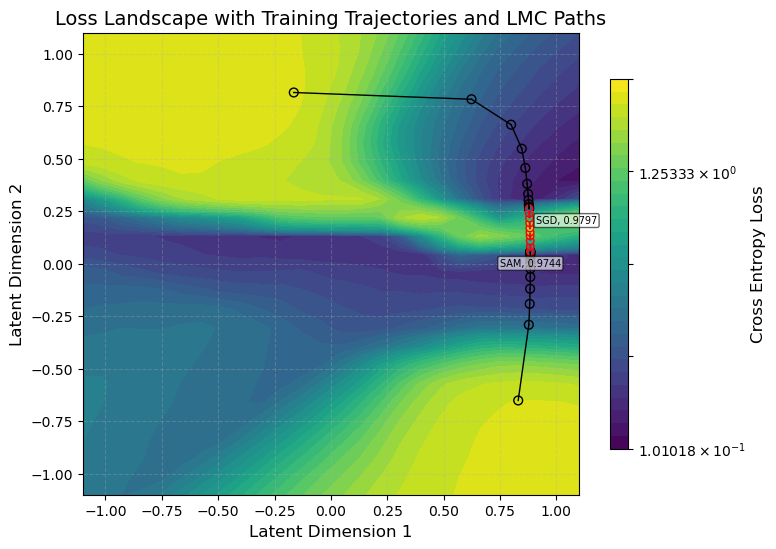

In [39]:
fig_lmc = plot_loss_landscape(
    xx, yy,
    grid_losses,
    tr_losses, # real_losses or tr_losses
    tr_coordinates,
    rec_grid_models=rec_grid_models,
    draw_density=False,
    filled_contours=True,
    trajectory_labels=titles,            # NEW: list of strs, one per trajectory - ['Test 1', 'Test 2', 'Test 3', 'Test 4'],
    label_positions=[('left', 'top'), ('center', 'top'), ('right', 'bottom'), ('right', 'top'), ('left', 'center'), ('center', 'bottom')], # ('left'|'center'|'right', 'top'|'center'|'bottom')
    lmc_coords_list=lmc_coords_list, # NEW
    lmc_losses_list=lmc_losses_list, # NEW
)

In [40]:
os.makedirs('plots', exist_ok=True)
filename = f"plots/loss_landscape_{vis_id}_{'with' if include_lmc else 'no'}_lmc.pdf"
fig_lmc.savefig(filename, dpi=300, bbox_inches='tight', format='pdf')
print(f"Saved PDF to {filename}")

Saved PDF to plots/loss_landscape_run-0013-CNN x run-0014-CNN_with_lmc.pdf


In [ ]:
from helper.neuro_viz import plot_density_only

fig_density = plot_density_only(xx, yy, rec_grid_models,
                                trajectory_coords_list=tr_coordinates)

In [ ]:
os.makedirs('plots', exist_ok=True)
fig_density.savefig(f'plots/loss_landscape_{vis_id}_density.pdf', dpi=300, bbox_inches='tight', format='pdf')
print(f"Saved PDF to plots/loss_landscape_{vis_id}_density.pdf")